In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import random
import warnings
warnings.filterwarnings("ignore")
random.seed(42)

In [302]:
from google.colab import drive
drive.mount('/content/drive')

In [303]:
# Load Data
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/online_retail_normalized.xlsx")
#df = pd.read_excel("online_retail_normalized.xlsx")

In [304]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledQuantity,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390453 entries, 0 to 390452
Data columns (total 10 columns):
InvoiceNo            390453 non-null int64
StockCode            390453 non-null object
Description          390453 non-null object
Quantity             390453 non-null int64
InvoiceDate          390453 non-null datetime64[ns]
UnitPrice            390453 non-null float64
CustomerID           390453 non-null int64
Country              390453 non-null object
CancelledQuantity    390453 non-null int64
TotalPrice           390453 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 29.8+ MB


In [306]:
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
CancelledQuantity    0
TotalPrice           0
dtype: int64

In [307]:
df['CustomerID']=df['CustomerID'].astype(str)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390453 entries, 0 to 390452
Data columns (total 10 columns):
InvoiceNo            390453 non-null int64
StockCode            390453 non-null object
Description          390453 non-null object
Quantity             390453 non-null int64
InvoiceDate          390453 non-null datetime64[ns]
UnitPrice            390453 non-null float64
CustomerID           390453 non-null object
Country              390453 non-null object
CancelledQuantity    390453 non-null int64
TotalPrice           390453 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 29.8+ MB


## Modeling

In [309]:
#transform data

In [310]:
#total sales per customer

In [311]:
df_sum_per_customer = df.groupby('CustomerID')['TotalPrice'].sum()

In [312]:
df_sum_per_customer = df_sum_per_customer.reset_index()
pd.set_option('display.float_format', '{:.2f}'.format)
df_sum_per_customer.head()

,CustomerID,TotalPrice
0,12347,4310.00
1,12348,1797.24
2,12349,1757.55
3,12350,334.40
4,12352,2405.51


In [313]:
df_sum_per_customer[df_sum_per_customer['TotalPrice']==0]

,CustomerID,TotalPrice
681,13256,0.00


In [314]:
# to drop later

In [315]:
#invoice per customer

In [316]:
df_invoice_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

In [317]:
df_invoice_per_customer = df_invoice_per_customer.reset_index()
df_invoice_per_customer.head()

,CustomerID,InvoiceNo
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,8


In [318]:
#Recency

In [319]:
df['Recency'] = max(df['InvoiceDate']) - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledQuantity,TotalPrice,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,373 days 04:24:00


In [320]:
df_days_per_customer = df.groupby('CustomerID')['Recency'].min()
df_days_per_customer = df_days_per_customer.reset_index()
df_days_per_customer.head()

,CustomerID,Recency
0,12347,1 days 20:58:00
1,12348,74 days 23:37:00
2,12349,18 days 02:59:00
3,12350,309 days 20:49:00
4,12352,35 days 22:13:00


In [321]:
df_days_per_customer['Recency'] = df_days_per_customer['Recency'].dt.days
df_days_per_customer.head()

,CustomerID,Recency
0,12347,1
1,12348,74
2,12349,18
3,12350,309
4,12352,35


In [322]:
df_model_2 = pd.merge(df_sum_per_customer, df_invoice_per_customer, on = 'CustomerID')
df_model_3 = pd.merge(df_model_2, df_days_per_customer, on = 'CustomerID')
df_model_3.rename(columns = {'TotalPrice' : 'Monetary', 'InvoiceNo' : 'Frequency'}, inplace = True)
df_model_3.head()

,CustomerID,Monetary,Frequency,Recency
0,12347,4310.00,7,1
1,12348,1797.24,4,74
2,12349,1757.55,1,18
3,12350,334.40,1,309
4,12352,2405.51,8,35


#### remove negative values

In [323]:
#remove monetary value <=0

In [324]:
df_model_3[df_model_3['Monetary'] <= 0].count()

CustomerID    1
Monetary      1
Frequency     1
Recency       1
dtype: int64

In [325]:
rfm = df_model_3[df_model_3['Monetary'] > 0]
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4327 entries, 0 to 4327
Data columns (total 4 columns):
CustomerID    4327 non-null object
Monetary      4327 non-null float64
Frequency     4327 non-null int64
Recency       4327 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 169.0+ KB


In [326]:
#feature preprocessing

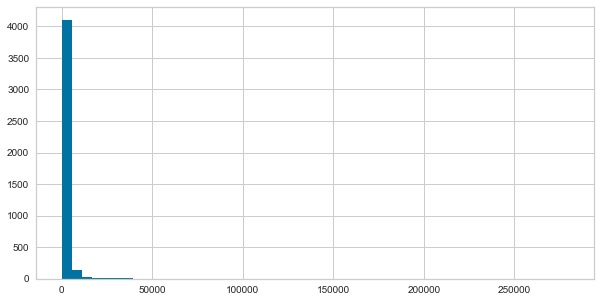

In [327]:
rfm['Monetary'].hist(bins=50, figsize=(10,5))
plt.show()

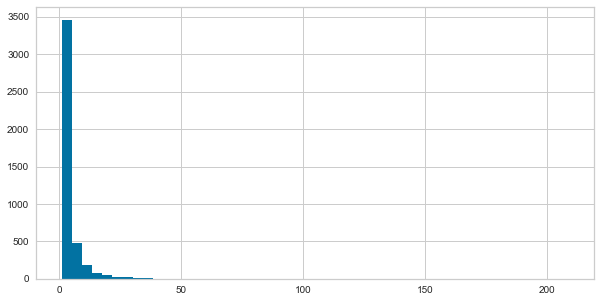

In [328]:
rfm['Frequency'].hist(bins=50, figsize=(10,5))
plt.show()

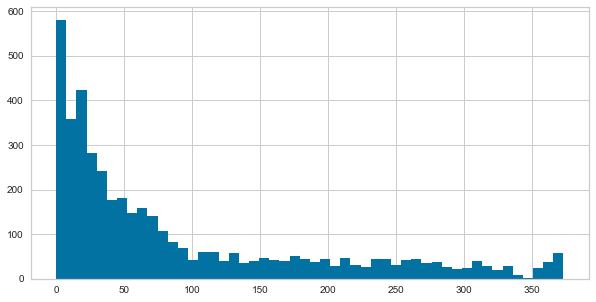

In [329]:
rfm['Recency'].hist(bins=50, figsize=(10,5))
plt.show()

In [330]:
#normalization

In [331]:
rfm['Monetary1'] = rfm['Monetary'].apply(np.log)
rfm['Recency1'] = rfm['Recency'].apply(np.sqrt)
rfm['Frequency1'] = rfm['Frequency'].apply(np.log)
rfm.head()

,CustomerID,Monetary,Frequency,Recency,Monetary1,Recency1,Frequency1
0,12347,4310.00,7,1,8.37,1.00,1.95
1,12348,1797.24,4,74,7.49,8.60,1.39
2,12349,1757.55,1,18,7.47,4.24,0.00
3,12350,334.40,1,309,5.81,17.58,0.00
4,12352,2405.51,8,35,7.79,5.92,2.08


In [332]:
#pt = PowerTransformer(method='yeo-johnson').fit(df_model_3[discrete_vars + continuous_vars])
#X = pd.DataFrame(pt.transform(df_model_3[discrete_vars + continuous_vars]))

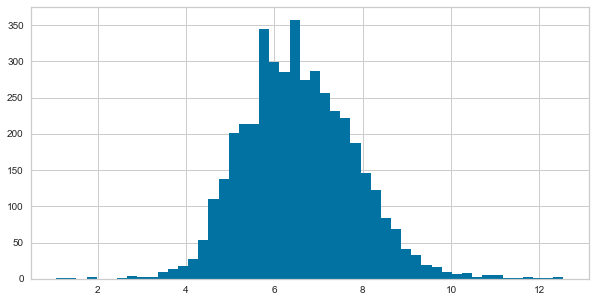

In [333]:
rfm['Monetary1'].hist(bins=50, figsize=(10,5))
plt.show()

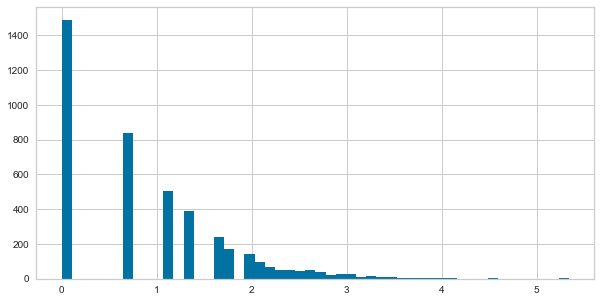

In [334]:
rfm['Frequency1'].hist(bins=50, figsize=(10,5))
plt.show()

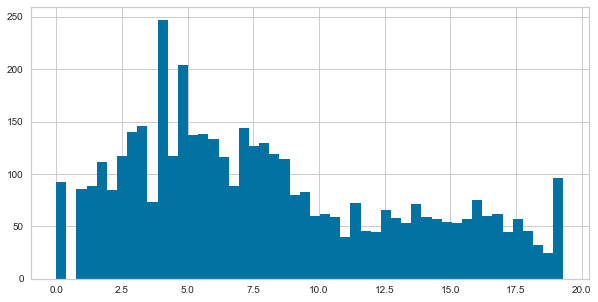

In [335]:
rfm['Recency1'].hist(bins=50, figsize=(10,5))
plt.show()

In [336]:
rfm_cols =['Frequency1', 'Recency1','Monetary1']

In [337]:
num_scl_step = ('scl', StandardScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, rfm_cols)]

In [338]:
ct = ColumnTransformer(num_transformers)
ct.fit(rfm[rfm_cols])
X = ct.transform(rfm[rfm_cols])

In [339]:
#X = rfm[rfm_cols].values

In [340]:
y = rfm[['CustomerID']].values

## Common Clustering and Prediction Model Codes

In [341]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ROCAUC
import time
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


def shape():
    print('First cluster has', (cluster0.shape[0]), 'customers who placed',(round(cluster0['Frequency'].mean())),'orders in a year with an average spending of',(round(cluster0['Monetary'].mean())),'pounds.','Average Recency =',(round(cluster0['Recency'].mean())),'days.')
    print('Second cluster has', (cluster1.shape[0]), 'customers who placed',(round(cluster1['Frequency'].mean())),'orders in a year with an average spending of',(round(cluster1['Monetary'].mean())),'pounds.','Average Recency =',(round(cluster1['Recency'].mean())),'days.')
    print('Third cluster has', (cluster2.shape[0]), 'customers who placed',(round(cluster2['Frequency'].mean())),'orders in a year with an average spending of',(round(cluster2['Monetary'].mean())),'pounds.','Average Recency =',(round(cluster2['Recency'].mean())),'days.')

def describe_clusters(rfm):
  print(rfm[rfm['Cluster'] == 0].describe())
  print(rfm[rfm['Cluster'] == 1].describe())
  print(rfm[rfm['Cluster'] == 2].describe())

def plot_3d_cluster(rfm):
    fig = plt.figure(figsize=(7, 7))
    ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
    ax.scatter(rfm['Frequency1'],
               rfm['Recency1'],
               rfm['Monetary1'],
               c = rfm['Cluster'], s = 50, edgecolor='k', cmap='viridis')
    ax.set_xlabel('Frequency1')
    ax.set_ylabel('Recency1')
    ax.set_zlabel('Monetary1')
    plt.show()


def plot_scatter_clusters(rfm):
  fig = plt.figure(figsize=(20,5))
  rfm.plot.scatter(x='Frequency1', y='Recency1', colormap='viridis', colorbar=False, c='Cluster',ax=fig.add_subplot(1,3,1))
  rfm.plot.scatter(x='Monetary1', y='Frequency1', colormap='viridis', colorbar=False, c='Cluster',ax=fig.add_subplot(1,3,2))
  rfm.plot.scatter(x='Recency1', y='Monetary1', colormap='viridis', colorbar=False, c='Cluster', ax=fig.add_subplot(1,3,3))
  plt.show()

def plot_box_clusters(rfm):
  fig = plt.figure(figsize=(20,5))
  sns.boxplot(x='Cluster', y='Recency1', data=rfm, ax=fig.add_subplot(1,3,1))
  sns.boxplot(x='Cluster', y='Frequency1', data=rfm, ax=fig.add_subplot(1,3,2))
  sns.boxplot(x='Cluster', y='Monetary1', data=rfm, ax=fig.add_subplot(1,3,3))
  plt.show()

def hyperparameter_tuning(X_train, y_train):
  param = {"n_neighbors": [3,4,5]}
  gsearch = GridSearchCV(KNeighborsClassifier(), param).fit(X_train, y_train)
  print("KNeighborsClassifier best score:", gsearch.best_score_)
  print("KNeighborsClassifier best params:",gsearch.best_params_)

  #param = {"max_depth": [3,4,5],
  param = {"max_depth": [1,2,3], 
          "splitter": ["best", "random"],
          "criterion": ["gini", "entropy"]
          }
  gsearch = GridSearchCV(DecisionTreeClassifier(), param).fit(X_train, y_train)
  print("DecisionTreeClassifier best score:", gsearch.best_score_)
  print("DecisionTreeClassifier best params:",gsearch.best_params_)

  #param = {"max_depth": [3,4,5],
  param = {"max_depth": [1,2,3],
        "criterion": ["gini", "entropy"]
        }
  gsearch = GridSearchCV(RandomForestClassifier(), param).fit(X_train, y_train)
  print("RandomForestClassifier best score:", gsearch.best_score_)
  print("RandomForestClassifier best params:",gsearch.best_params_)

  #reuse the same param as RandomForest
  gsearch = GridSearchCV(ExtraTreesClassifier(), param).fit(X_train, y_train)
  print("ExtraTreesClassifier best score:", gsearch.best_score_)
  print("ExtraTreesClassifier best params:",gsearch.best_params_)

  param = {"learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5],
          #"n_estimators": [100, 200]}
          "n_estimators": [10, 20, 50]}
  gsearch = GridSearchCV(AdaBoostClassifier(), param).fit(X_train, y_train)
  print("AdaBoostClassifier best score:", gsearch.best_score_)
  print("AdaBoostClassifier best params:",gsearch.best_params_)

  #reuse the same param as AdaBoost
  gsearch = GridSearchCV(GradientBoostingClassifier(), param).fit(X_train, y_train)
  print("GradientBoostingClassifier best score:", gsearch.best_score_)
  print("GradientBoostingClassifier best params:",gsearch.best_params_)

def plot_classification_report(X_train, y_train, X_test, y_test, models, classes):
  accuracy_scores = []
  for name, model in models:
    visualizer = ClassificationReport(model, classes=classes, support=True)
    visualizer.fit(X_train, y_train)  
    score = visualizer.score(X_test, y_test) 
    accuracy_scores.append((name, score))
    visualizer.show() 
  display(pd.DataFrame(accuracy_scores))

def summary_scores(X_train, y_train, X_test, y_test, models, classes):
  scores = []
  names = []
  for name, model in models:
    rtime_start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rtime = (time.time() - rtime_start)
    accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
    f1 = f1_score(y_test, y_pred, average= 'weighted')
    precision = precision_score(y_test, y_pred, average= 'weighted')
    recall = recall_score(y_test, y_pred, average= 'weighted')
    scores.append((rtime, accuracy, f1, precision, recall))
    names.append(name)
  # Make a Dataframe
  compare_df = pd.DataFrame(scores, columns= ['Prediction_Time', 'Accuracy_Score', 'f1', 'Precision', 'Recall'], index = names)
  compare_df = compare_df.sort_values(by='Accuracy_Score', ascending= False)
  # coloring based on their performance
  cn = sns.light_palette('lime',as_cmap=True)
  display(compare_df.style.background_gradient(cmap=cn))

def plot_class_prediction_error(X_train, y_train, X_test, y_test, models, classes):
  for name, model in models:
    visualizer = ClassPredictionError(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()  
def plot_roc(X_train, y_train, X_test, y_test, models, classes):
  for name, model in models:
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)       
    visualizer.score(X_test, y_test)        
    visualizer.show()  


### K-means

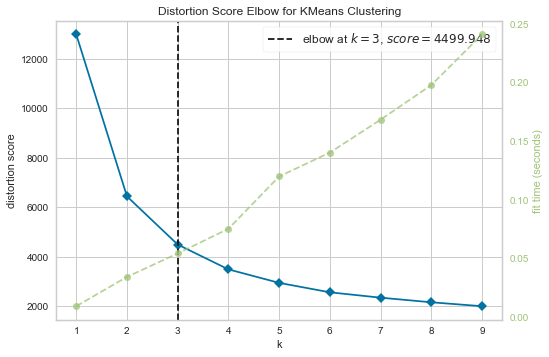

In [342]:
# !pip install yellowbrick
from yellowbrick.cluster.elbow import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(random_state=4), k=(1,10))
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

### Silhouette Analysis

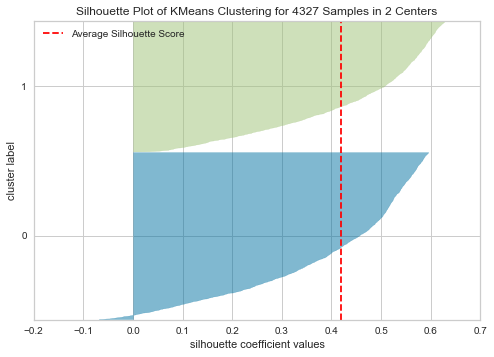

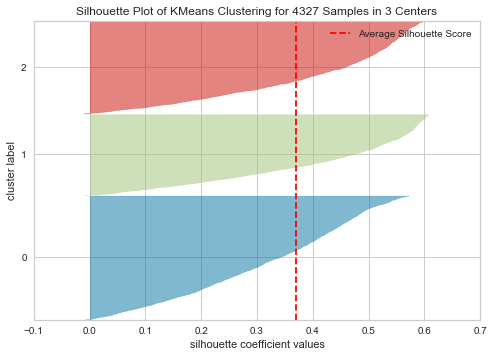

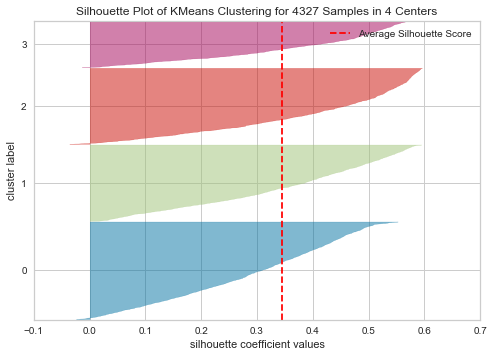

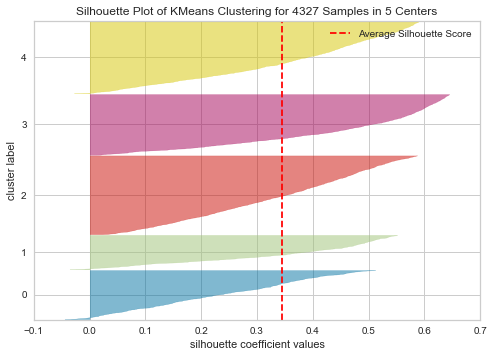

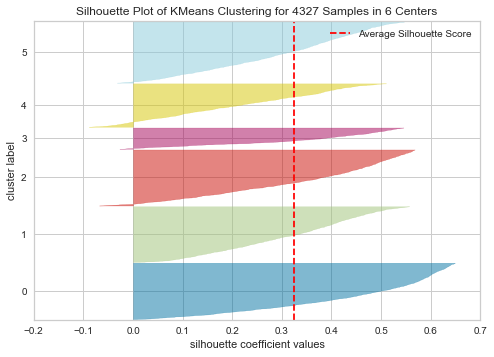

In [343]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2, 3, 4, 5, 6]:
    model = KMeans(n_clusters=i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [344]:
#From the elbow graphs and Silhouette visualization above, we can say the optimal K = 3.

In [345]:
kmeans = KMeans(n_clusters= 3)
kmeans = kmeans.fit(X)
label = kmeans.labels_

In [346]:
rfm['Cluster'] = label
rfm.head()

,CustomerID,Monetary,Frequency,Recency,Monetary1,Recency1,Frequency1,Cluster
0,12347,4310.00,7,1,8.37,1.00,1.95,2
1,12348,1797.24,4,74,7.49,8.60,1.39,2
2,12349,1757.55,1,18,7.47,4.24,0.00,0
3,12350,334.40,1,309,5.81,17.58,0.00,1
4,12352,2405.51,8,35,7.79,5.92,2.08,2


In [347]:
describe_clusters(rfm)

       Monetary  Frequency  Recency  Monetary1  Recency1  Frequency1  Cluster
count   1806.00    1806.00  1806.00    1806.00   1806.00     1806.00  1806.00
mean     613.21       2.07    46.13       6.15      6.27        0.60     0.00
std      477.68       1.04    33.33       0.77      2.60        0.51     0.00
min        6.90       1.00     0.00       1.93      0.00        0.00     0.00
25%      296.59       1.00    19.00       5.69      4.36        0.00     0.00
50%      515.28       2.00    39.00       6.24      6.24        0.69     0.00
75%      797.61       3.00    69.00       6.68      8.31        1.10     0.00
max     6207.67       7.00   174.00       8.73     13.19        1.95     0.00
       Monetary  Frequency  Recency  Monetary1  Recency1  Frequency1  Cluster
count   1178.00    1178.00  1178.00    1178.00   1178.00     1178.00  1178.00
mean     396.14       1.43   233.87       5.62     15.08        0.25     1.00
std      409.97       0.81    75.30       0.87      2.52        

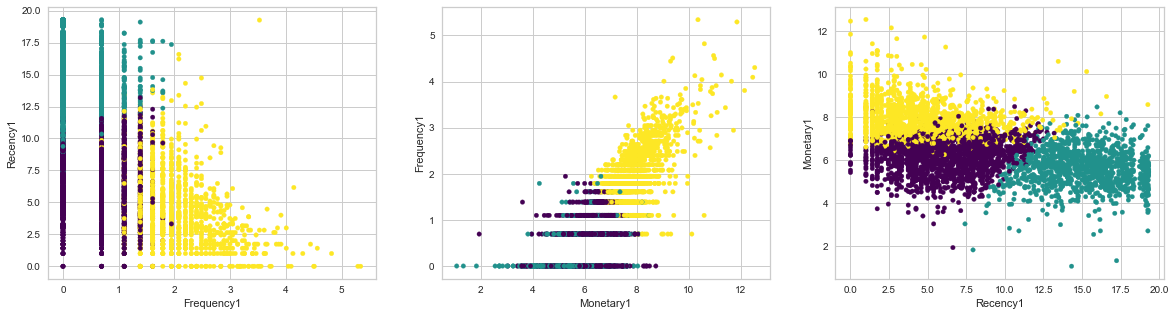

In [348]:
plot_scatter_clusters(rfm)

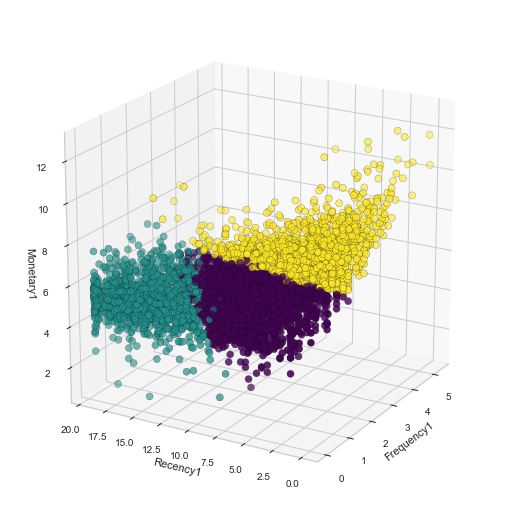

In [349]:
plot_3d_cluster(rfm)

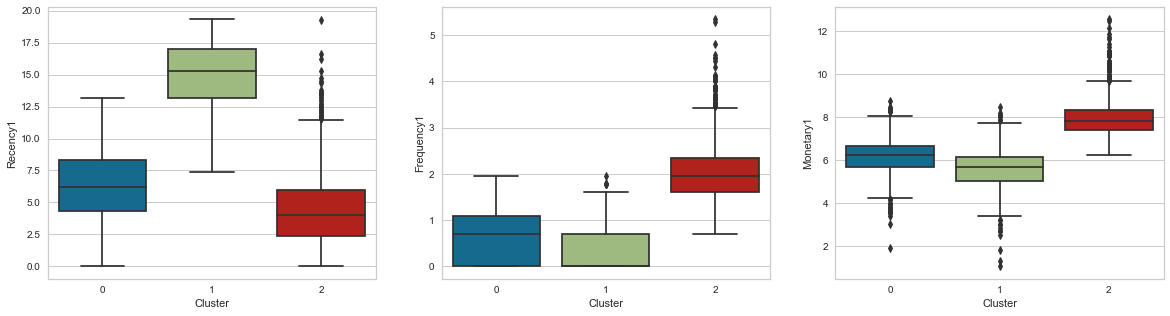

In [350]:
plot_box_clusters(rfm)

In [351]:
cluster0 = rfm[rfm['Cluster'] == 0]
cluster1 = rfm[rfm['Cluster'] == 1]
cluster2 = rfm[rfm['Cluster'] == 2]
shape()

First cluster has 1806 customers who placed 2 orders in a year with an average spending of 613 pounds. Average Recency = 46 days.
Second cluster has 1178 customers who placed 1 orders in a year with an average spending of 396 pounds. Average Recency = 234 days.
Third cluster has 1343 customers who placed 10 orders in a year with an average spending of 5132 pounds. Average Recency = 28 days.


We also can see that the highest spending group has the lowest recency value which means this type of group kept purchasing from the website, whereas the lowest spending group stopped shopping almost 8 months ago.


In [352]:
#split training and test sets
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = rfm.drop(columns=['Cluster','Monetary', 'Recency','Frequency'])
y = rfm['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

hyperparameter_tuning(X_train, y_train)


KNeighborsClassifier best score: 0.5274108322324967
KNeighborsClassifier best params: {'n_neighbors': 3}
DecisionTreeClassifier best score: 0.9372523117569352
DecisionTreeClassifier best params: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
RandomForestClassifier best score: 0.9458388375165125
RandomForestClassifier best params: {'criterion': 'entropy', 'max_depth': 3}
ExtraTreesClassifier best score: 0.9190885072655218
ExtraTreesClassifier best params: {'criterion': 'entropy', 'max_depth': 3}
AdaBoostClassifier best score: 0.9339498018494056
AdaBoostClassifier best params: {'learning_rate': 0.5, 'n_estimators': 20}
GradientBoostingClassifier best score: 0.9798546895640687
GradientBoostingClassifier best params: {'learning_rate': 0.2, 'n_estimators': 50}


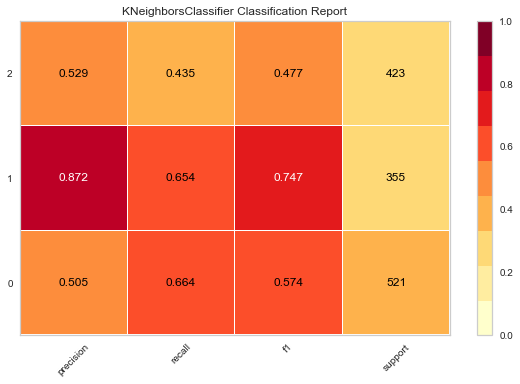

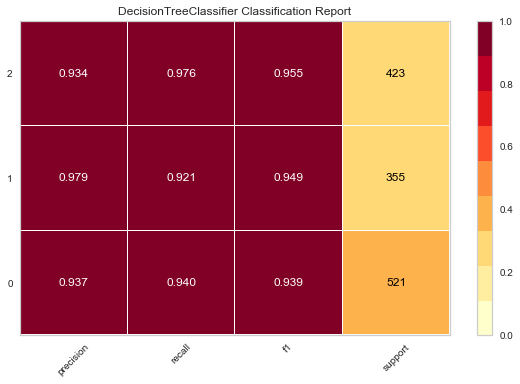

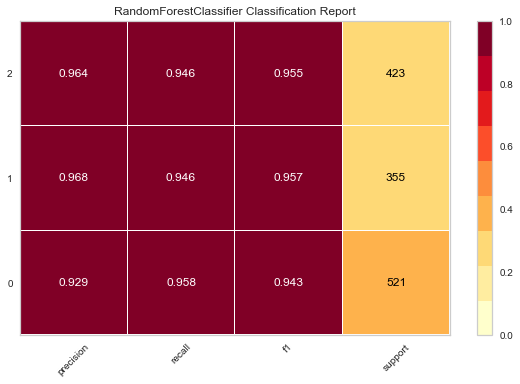

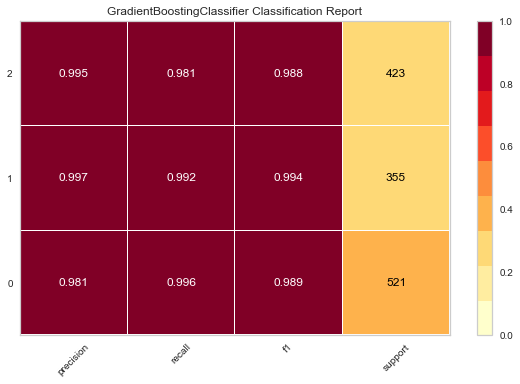

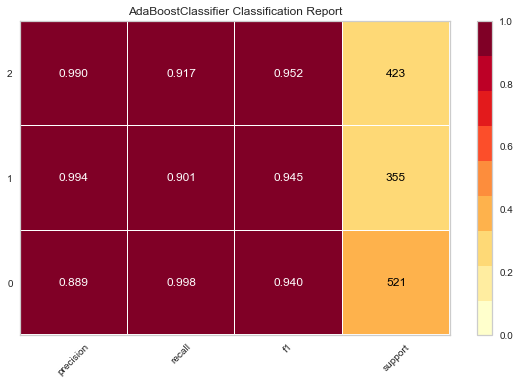

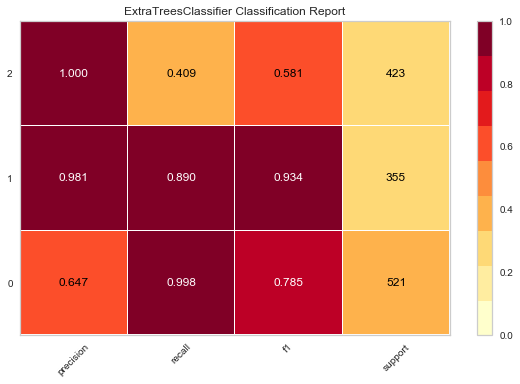

,0,1
0,KNeighborsClassifier,0.59
1,DecisionTreeClassifier,0.95
2,RandomForestClassifier,0.95
3,GradientBoostingClassifier,0.99
4,AdaBoostClassifier,0.95
5,ExtraTreesClassifier,0.78


In [353]:
dtc = DecisionTreeClassifier(max_depth=3, criterion='gini', splitter='best')
rfc = RandomForestClassifier(max_depth=3, criterion='gini')
etc = ExtraTreesClassifier(max_depth=2, criterion='entropy')
knn = KNeighborsClassifier(3)
gbc = GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)
abc = AdaBoostClassifier(learning_rate=0.5, n_estimators=20)

models = []
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',abc))
models.append(('ExtraTreesClassifier',etc))

classes = ["0", "1", "2"]
plot_classification_report(X_train, y_train, X_test, y_test, models, classes)    

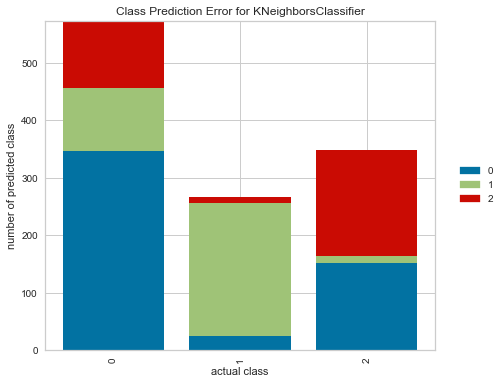

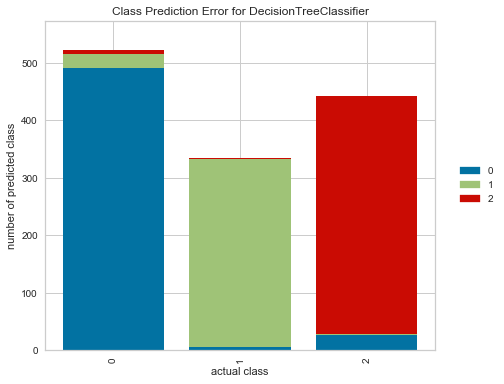

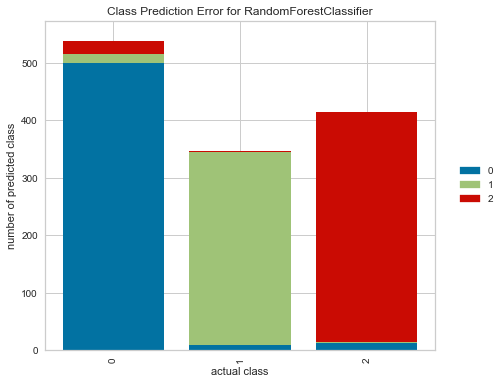

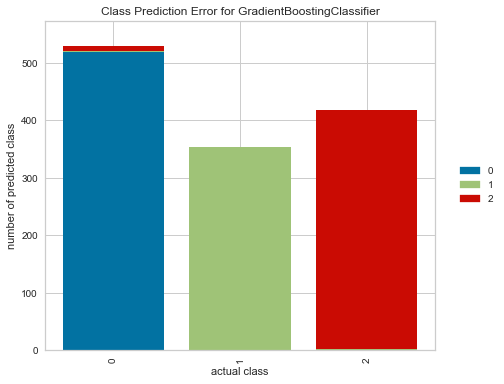

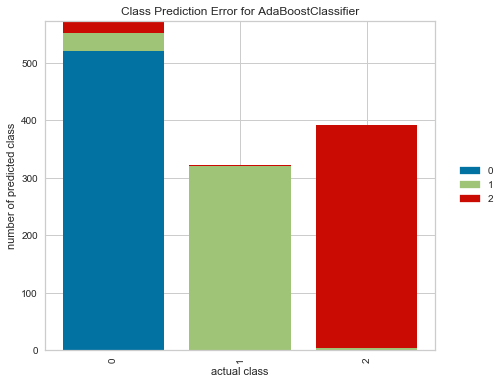

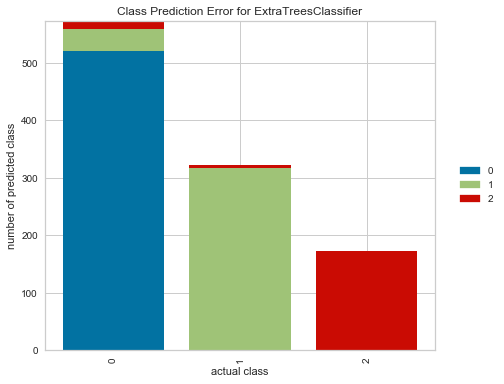

In [354]:
 plot_class_prediction_error(X_train, y_train, X_test, y_test, models, classes)

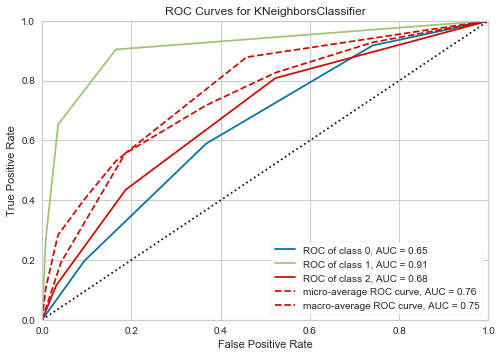

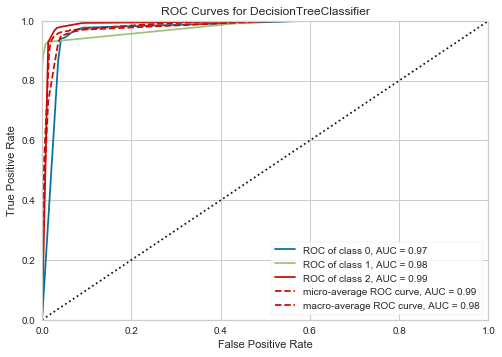

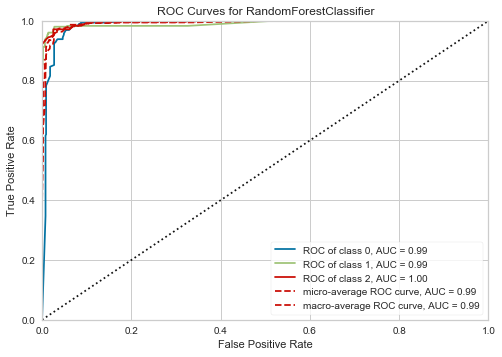

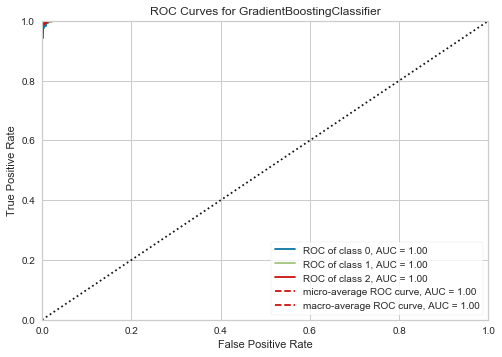

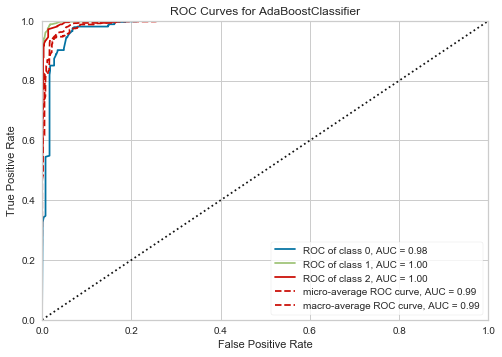

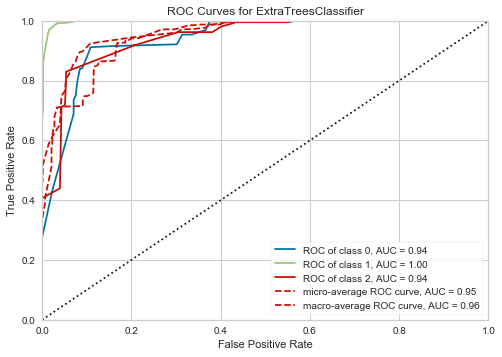

In [355]:
plot_roc(X_train, y_train, X_test, y_test, models, classes)

In [356]:
summary_scores(X_train, y_train, X_test, y_test, models, classes)

,Prediction_Time,Accuracy_Score,f1,Precision,Recall
GradientBoostingClassifier,0.253229,99,0.989996,0.990082,0.989992
RandomForestClassifier,0.0170155,95.69,0.956925,0.957663,0.95689
DecisionTreeClassifier,0.00400352,94.69,0.946849,0.9476,0.946882
AdaBoostClassifier,0.0790718,94.53,0.945547,0.950416,0.945343
ExtraTreesClassifier,0.0110104,91.38,0.91336,0.926024,0.91378
KNeighborsClassifier,0.0280252,58.66,0.589759,0.613119,0.586605


## Hierarchical Cluster

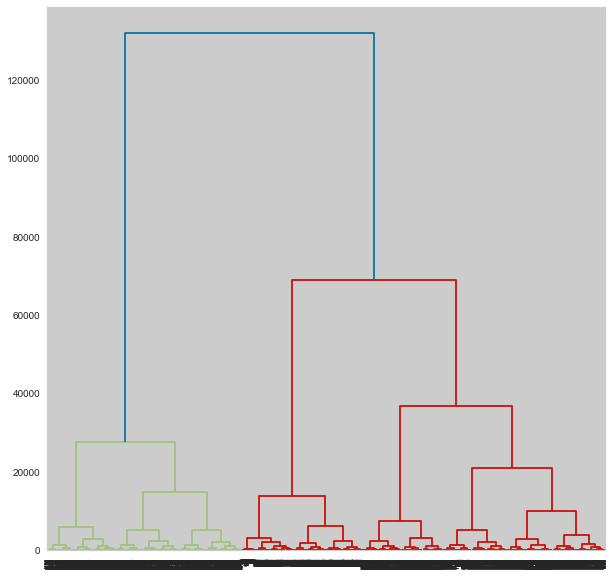

In [272]:
# Using the dendrogram to find the optimal number of clusters
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster import hierarchy

hierarchy.set_link_color_palette(None)

#X = rfm.drop(columns=['Cluster','Monetary', 'Recency','Frequency'])

fig = plt.figure(figsize=(10, 10), facecolor="white")
mergings = linkage(X, method='ward')

dendrogram(mergings)
plt.show()

In [273]:
hcluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
hcluster_labels
rfm['Cluster'] = hcluster_labels
rfm.head()

,CustomerID,Monetary,Frequency,Recency,Monetary1,Recency1,Frequency1,Cluster
0,12347,4310.00,7,1,8.37,1.00,1.95,0
1,12348,1797.24,4,74,7.49,8.60,1.39,0
2,12349,1757.55,1,18,7.47,4.24,0.00,0
3,12350,334.40,1,309,5.81,17.58,0.00,0
4,12352,2405.51,8,35,7.79,5.92,2.08,0


In [274]:
describe_clusters(rfm)

       Monetary  Frequency  Recency  Monetary1  Recency1  Frequency1  Cluster
count    944.00     944.00   944.00     944.00    944.00      944.00   944.00
mean    2076.75       4.38    90.95       6.74      8.04        0.93     0.00
std     5490.89       9.37   100.44       1.27      5.14        0.91     0.00
min       15.00       1.00     0.00       2.71      0.00        0.00     0.00
25%      349.55       1.00    16.00       5.86      4.00        0.00     0.00
50%      771.35       2.00    51.00       6.65      7.14        0.69     0.00
75%     1957.75       5.00   133.00       7.58     11.53        1.61     0.00
max   123638.18     209.00   373.00      11.73     19.31        5.34     0.00
       Monetary  Frequency  Recency  Monetary1  Recency1  Frequency1  Cluster
count   1874.00    1874.00  1874.00    1874.00   1874.00     1874.00  1874.00
mean    2006.03       4.29    91.97       6.57      8.14        0.95     1.00
std     8984.99       7.80    99.83       1.25      5.08        

In [275]:
cluster0 = rfm[rfm['Cluster'] == 0]
cluster1 = rfm[rfm['Cluster'] == 1]
cluster2 = rfm[rfm['Cluster'] == 2]
shape()

First cluster has 944 customers who placed 4 orders in a year with an average spending of 2077 pounds. Average Recency = 91 days.
Second cluster has 1874 customers who placed 4 orders in a year with an average spending of 2006 pounds. Average Recency = 92 days.
Third cluster has 1509 customers who placed 4 orders in a year with an average spending of 1821 pounds. Average Recency = 92 days.


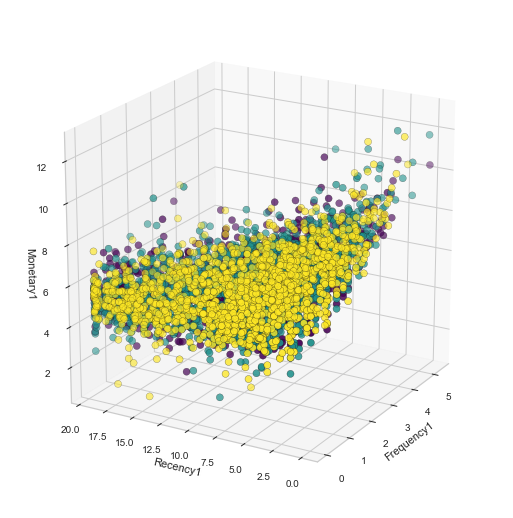

In [276]:
plot_3d_cluster(rfm)

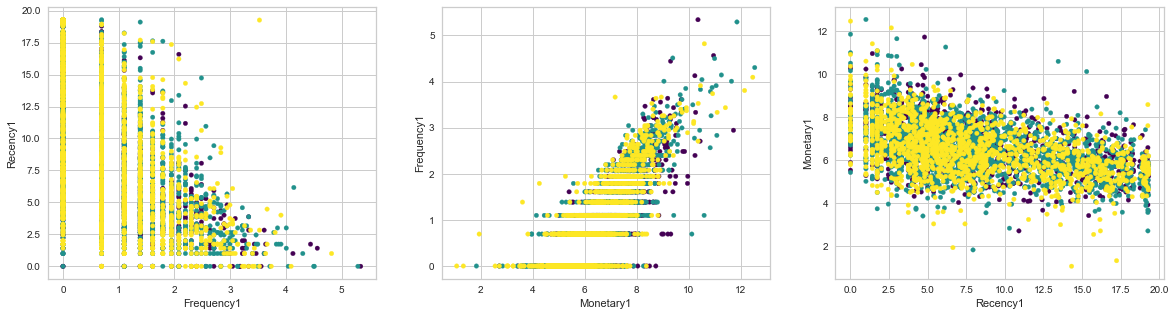

In [277]:
plot_scatter_clusters(rfm)

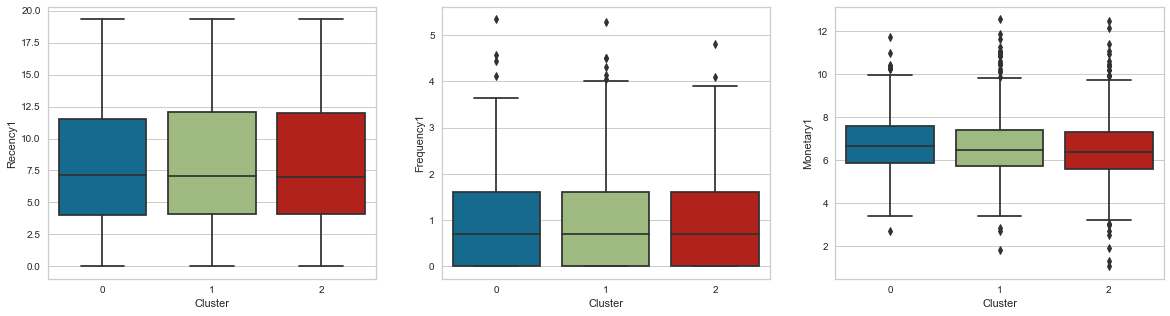

In [278]:
plot_box_clusters(rfm)

In [279]:
#split training and test sets
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = rfm.drop(columns=['Cluster','Monetary', 'Recency','Frequency'])
y = rfm['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

hyperparameter_tuning(X_train, y_train)

KNeighborsClassifier best score: 0.9991331984975441
KNeighborsClassifier best params: {'n_neighbors': 3}
DecisionTreeClassifier best score: 0.998844264663392
DecisionTreeClassifier best params: {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
RandomForestClassifier best score: 0.998844264663392
RandomForestClassifier best params: {'criterion': 'gini', 'max_depth': 3}
ExtraTreesClassifier best score: 0.9075411730713666
ExtraTreesClassifier best params: {'criterion': 'gini', 'max_depth': 3}
AdaBoostClassifier best score: 0.998844264663392
AdaBoostClassifier best params: {'learning_rate': 0.001, 'n_estimators': 50}
GradientBoostingClassifier best score: 0.998844264663392
GradientBoostingClassifier best params: {'learning_rate': 0.01, 'n_estimators': 20}


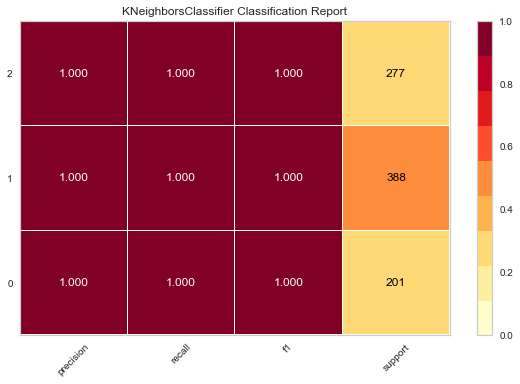

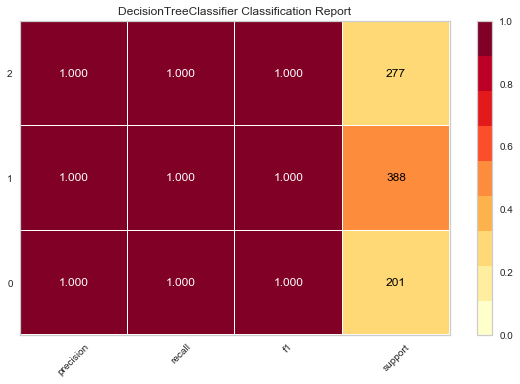

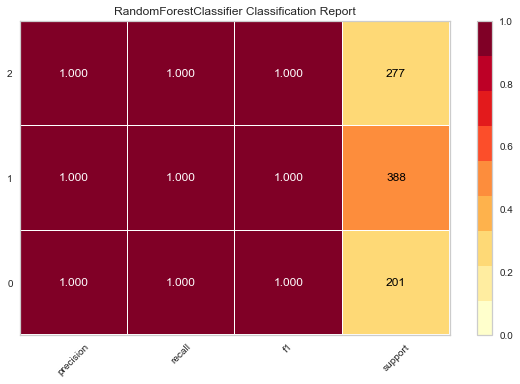

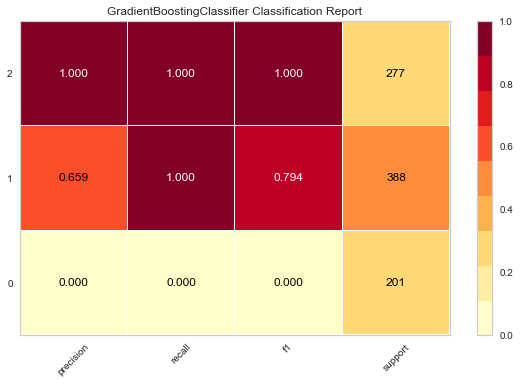

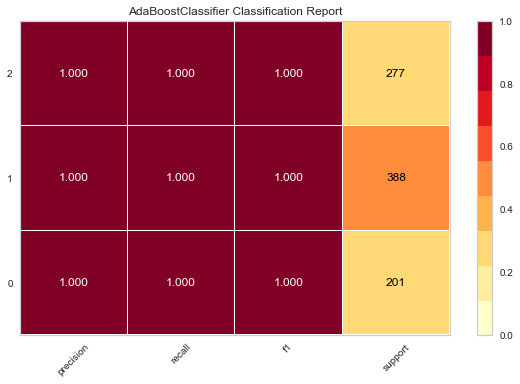

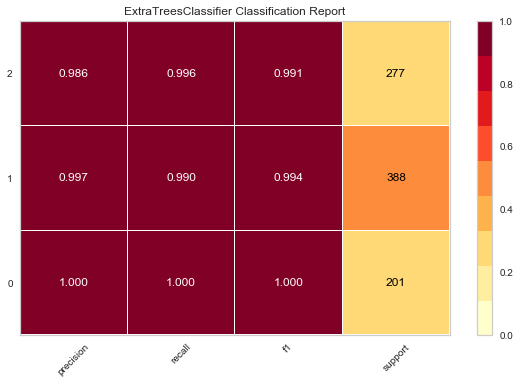

,0,1
0,KNeighborsClassifier,1.00
1,DecisionTreeClassifier,1.00
2,RandomForestClassifier,1.00
3,GradientBoostingClassifier,0.77
4,AdaBoostClassifier,1.00
5,ExtraTreesClassifier,0.99


In [280]:
dtc = DecisionTreeClassifier(max_depth=3, criterion='gini', splitter='best')
rfc = RandomForestClassifier(max_depth=3, criterion='gini')
etc = ExtraTreesClassifier(max_depth=5, criterion='gini')
knn = KNeighborsClassifier(5)
gbc = GradientBoostingClassifier(learning_rate=0.001, n_estimators=100)
abc = AdaBoostClassifier(learning_rate=0.001, n_estimators=200)

models = []
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',abc))
models.append(('ExtraTreesClassifier',etc))

classes = ["0", "1", "2"]
plot_classification_report(X_train, y_train, X_test, y_test, models, classes)    

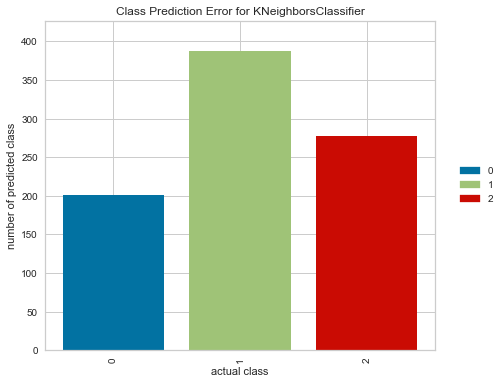

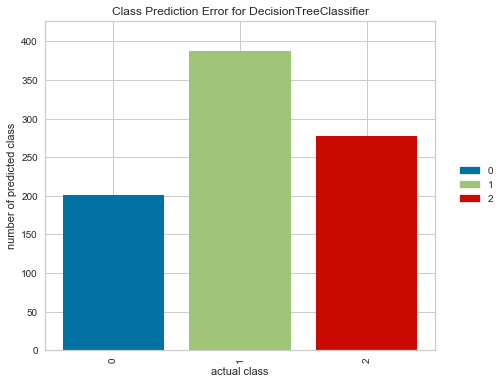

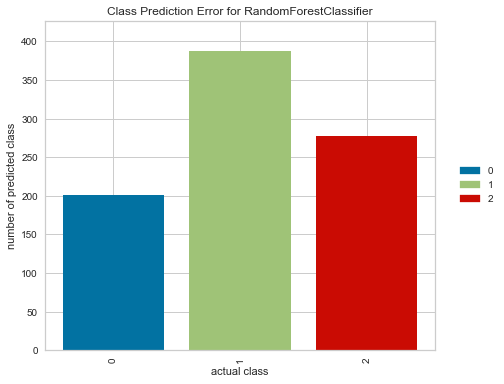

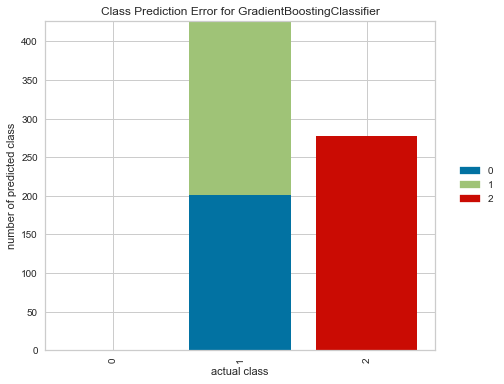

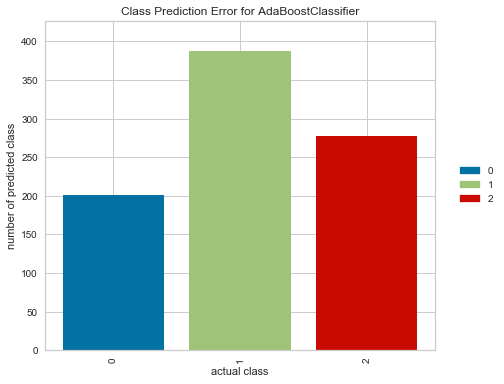

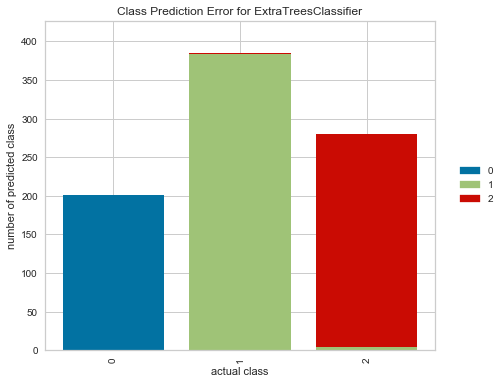

In [281]:
 plot_class_prediction_error(X_train, y_train, X_test, y_test, models, classes)

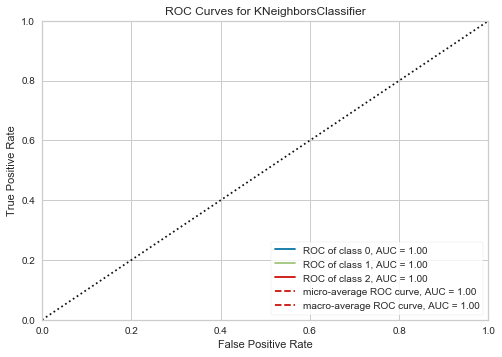

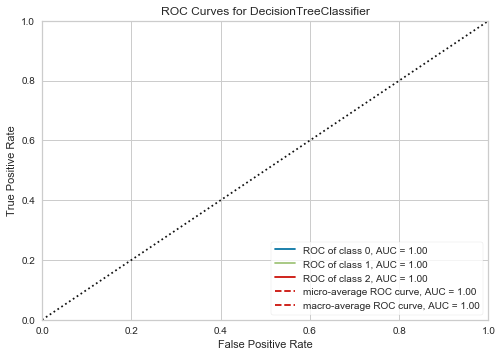

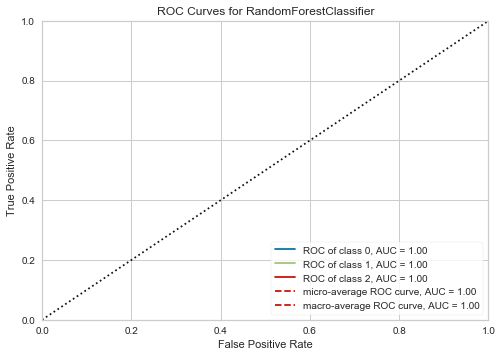

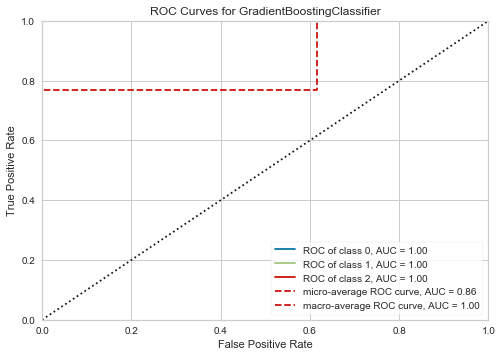

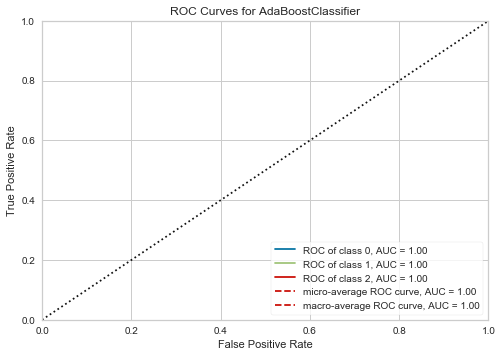

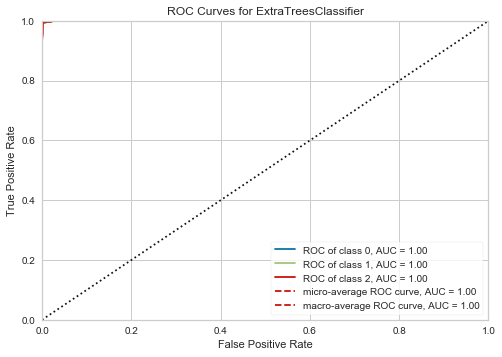

In [282]:
plot_roc(X_train, y_train, X_test, y_test, models, classes)

In [283]:
summary_scores(X_train, y_train, X_test, y_test, models, classes)

,Prediction_Time,Accuracy_Score,f1,Precision,Recall
KNeighborsClassifier,0.0200181,100,1,1,1
DecisionTreeClassifier,0.00400305,100,1,1,1
AdaBoostClassifier,0.748184,100,1,1,1
RandomForestClassifier,0.0160151,99.88,0.998845,0.998848,0.998845
ExtraTreesClassifier,0.0120113,96.3,0.963085,0.964391,0.963048
GradientBoostingClassifier,0.43139,76.79,0.675723,0.615003,0.767898


## DBSCAN

In [284]:
# using NearestNeighbors to find optimal eps
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [285]:
X = rfm.drop(columns=['Cluster','Monetary', 'Recency','Frequency'])

In [286]:
# elbow method
nearest_neighbors = NearestNeighbors(n_neighbors = 3)

nearest_neighbors.fit(X)

distances, indices = nearest_neighbors.kneighbors(X)

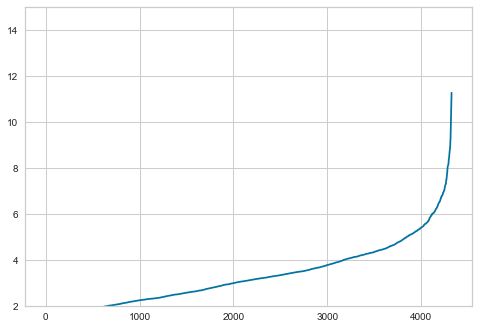

In [287]:
distances = np.sort(distances, axis=0)

distances = distances[:, 1]

plt.plot(distances)
plt.ylim([2, 15])
plt.show()

In [288]:
#min_samples method of dim*2
db = DBSCAN(eps = 10.25, min_samples = 6)
db.fit(X)

DBSCAN(algorithm='auto', eps=10.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [289]:
db_label = db.labels_

In [290]:
rfm['Cluster'] = db_label
rfm.head()

,CustomerID,Monetary,Frequency,Recency,Monetary1,Recency1,Frequency1,Cluster
0,12347,4310.00,7,1,8.37,1.00,1.95,0
1,12348,1797.24,4,74,7.49,8.60,1.39,0
2,12349,1757.55,1,18,7.47,4.24,0.00,0
3,12350,334.40,1,309,5.81,17.58,0.00,0
4,12352,2405.51,8,35,7.79,5.92,2.08,0


In [291]:
print(rfm[rfm['Cluster'] == -1].describe())
describe_clusters(rfm)

       Monetary  Frequency  Recency  Monetary1  Recency1  Frequency1  Cluster
count     16.00      16.00    16.00      16.00     16.00       16.00    16.00
mean     408.70       1.12   327.06       5.75     18.05        0.09    -1.00
std      319.00       0.34    39.84       0.74      1.13        0.24     0.00
min      108.07       1.00   234.00       4.68     15.30        0.00    -1.00
25%      152.47       1.00   303.25       5.02     17.41        0.00    -1.00
50%      334.62       1.00   336.00       5.81     18.33        0.00    -1.00
75%      468.90       1.00   360.25       6.15     18.98        0.00    -1.00
max     1250.37       2.00   372.00       7.13     19.29        0.69    -1.00
       Monetary  Frequency  Recency  Monetary1  Recency1  Frequency1  Cluster
count   1919.00    1919.00  1919.00    1919.00   1919.00     1919.00  1919.00
mean    2165.78       4.46    89.06       6.67      7.95        0.96     0.00
std     9045.12       9.21    98.38       1.27      5.08        

In [292]:
clustern1 = rfm[rfm['Cluster'] == -1]
cluster0 = rfm[rfm['Cluster'] == 0]
cluster1 = rfm[rfm['Cluster'] == 1]
cluster2 = rfm[rfm['Cluster'] == 2]
print('Noise cluster has', (clustern1.shape[0]), 'customers who placed',(round(clustern1['Frequency'].mean())),'orders in a year with an average spending of',(round(clustern1['Monetary'].mean())),'pounds.','Average Recency =',(round(clustern1['Recency'].mean())),'days.')
shape()

Noise cluster has 16 customers who placed 1 orders in a year with an average spending of 409 pounds. Average Recency = 327 days.
First cluster has 1919 customers who placed 4 orders in a year with an average spending of 2166 pounds. Average Recency = 89 days.
Second cluster has 665 customers who placed 4 orders in a year with an average spending of 1747 pounds. Average Recency = 95 days.
Third cluster has 1727 customers who placed 4 orders in a year with an average spending of 1820 pounds. Average Recency = 91 days.


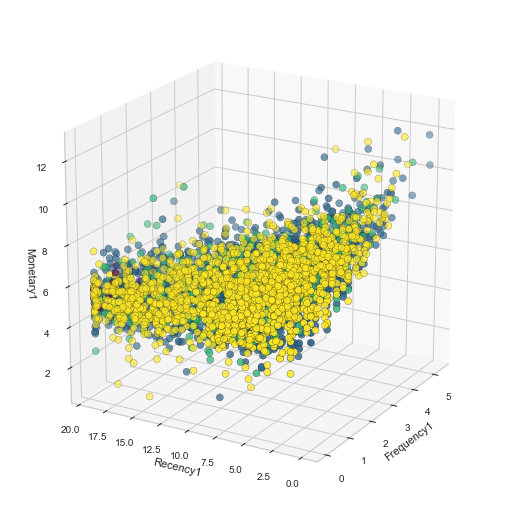

In [293]:
plot_3d_cluster(rfm)

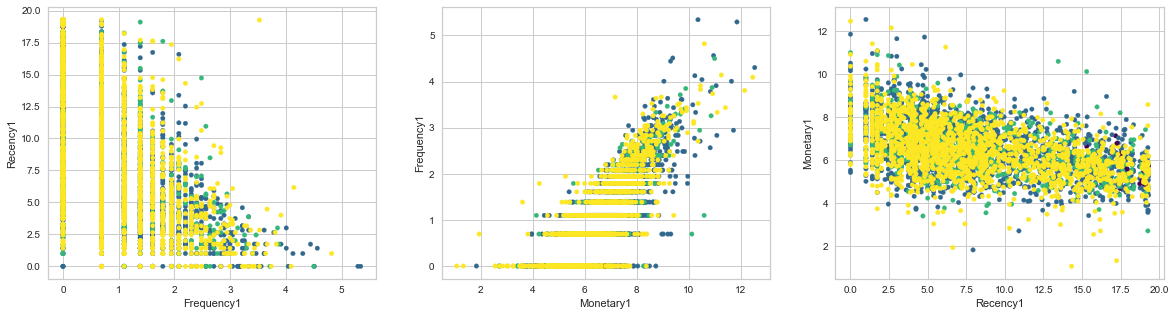

In [294]:
plot_scatter_clusters(rfm)

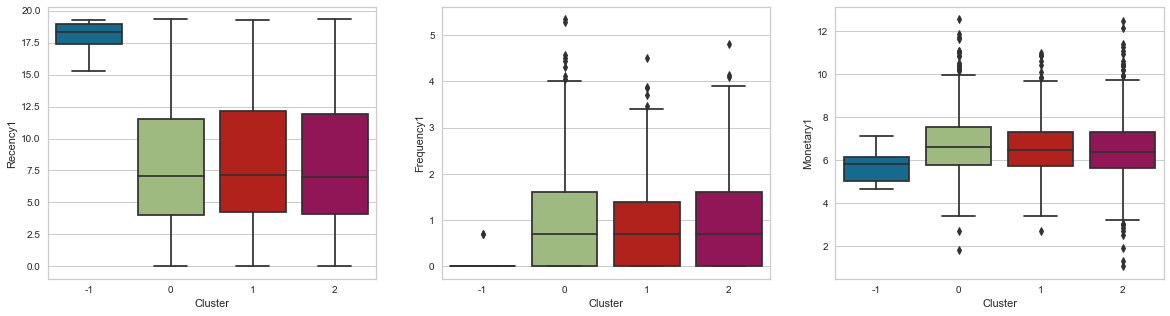

In [295]:
plot_box_clusters(rfm)

In [296]:
#split training and test sets
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = rfm.drop(columns=['Cluster','Monetary', 'Recency','Frequency'])
y = rfm['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

hyperparameter_tuning(X_train, y_train)

KNeighborsClassifier best score: 0.9959549263218723
KNeighborsClassifier best params: {'n_neighbors': 5}
DecisionTreeClassifier best score: 0.9959549263218723
DecisionTreeClassifier best params: {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
RandomForestClassifier best score: 0.9953770586535683
RandomForestClassifier best params: {'criterion': 'entropy', 'max_depth': 3}
ExtraTreesClassifier best score: 0.874024848309737
ExtraTreesClassifier best params: {'criterion': 'gini', 'max_depth': 3}
AdaBoostClassifier best score: 0.9959549263218723
AdaBoostClassifier best params: {'learning_rate': 0.001, 'n_estimators': 10}
GradientBoostingClassifier best score: 0.9956659924877204
GradientBoostingClassifier best params: {'learning_rate': 0.01, 'n_estimators': 50}


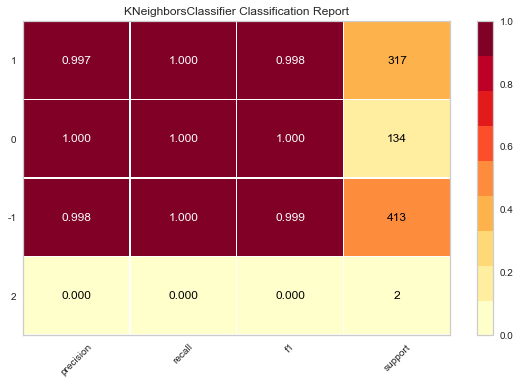

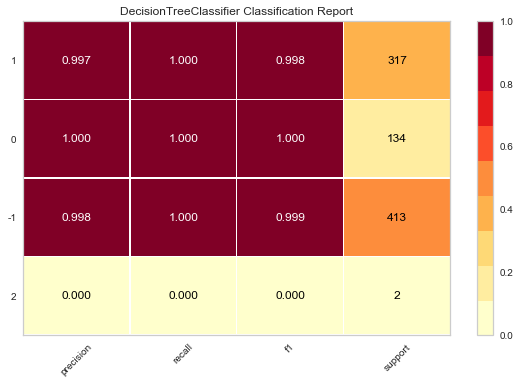

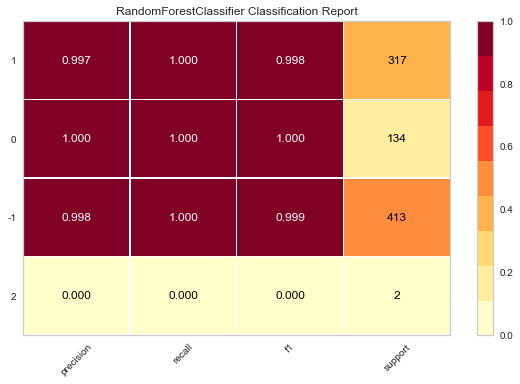

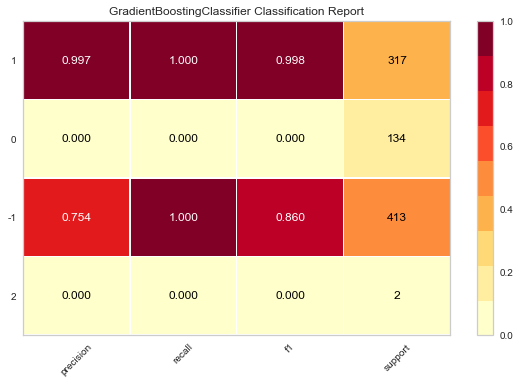

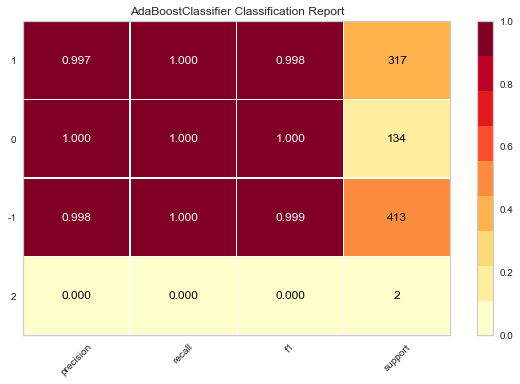

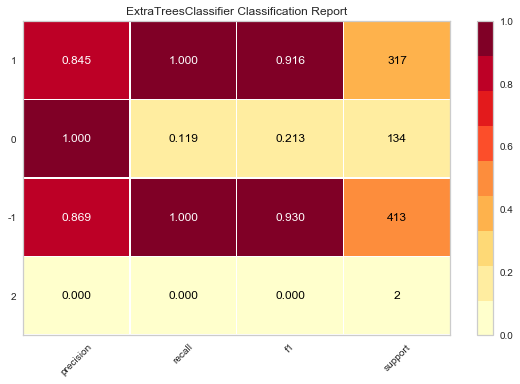

,0,1
0,KNeighborsClassifier,1.00
1,DecisionTreeClassifier,1.00
2,RandomForestClassifier,1.00
3,GradientBoostingClassifier,0.84
4,AdaBoostClassifier,1.00
5,ExtraTreesClassifier,0.86


In [297]:
dtc = DecisionTreeClassifier(max_depth=2, criterion='gini', splitter='best')
rfc = RandomForestClassifier(max_depth=3, criterion='entropy')
etc = ExtraTreesClassifier(max_depth=3, criterion='gini')
knn = KNeighborsClassifier(5)
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)
abc = AdaBoostClassifier(learning_rate=0.001, n_estimators=10)

models = []
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',abc))
models.append(('ExtraTreesClassifier',etc))

classes = ["-1", "0", "1", "2"]
plot_classification_report(X_train, y_train, X_test, y_test, models, classes)   

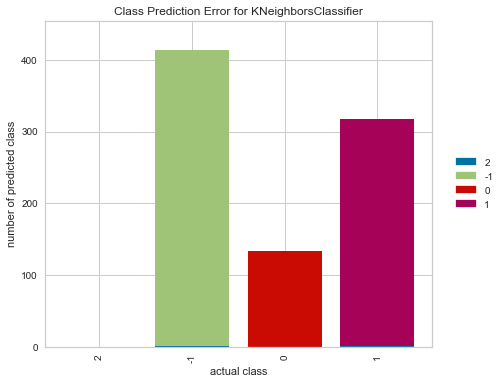

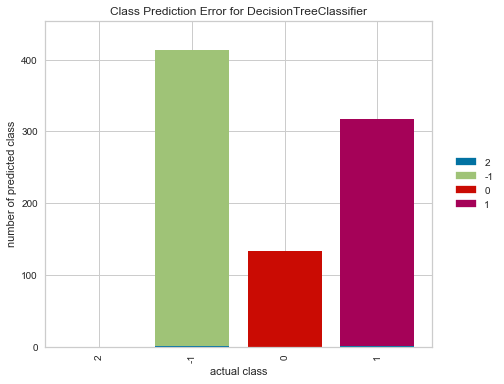

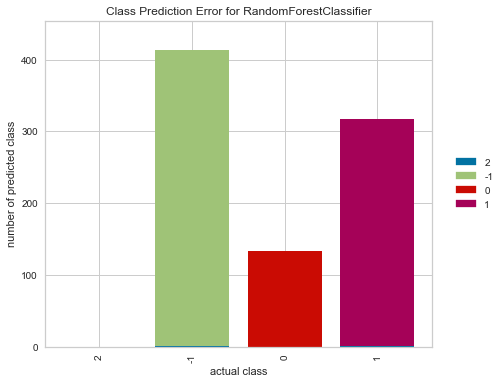

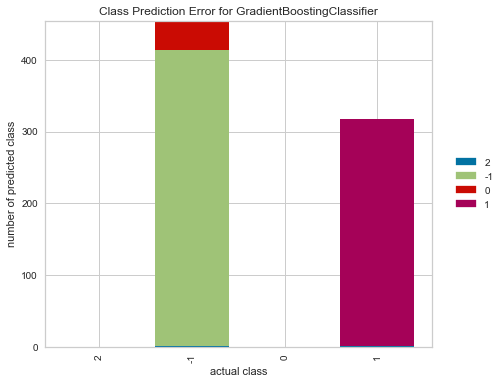

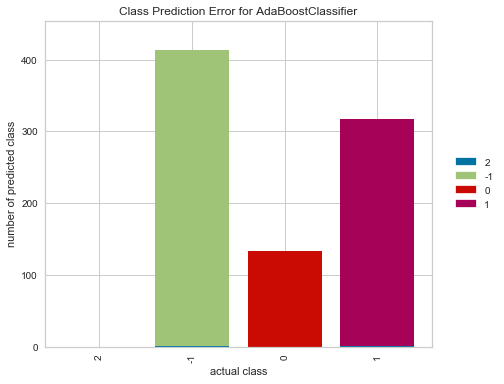

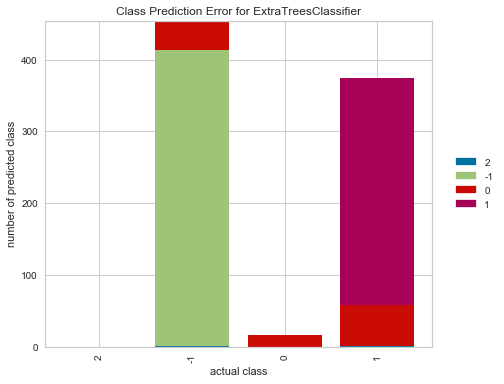

In [298]:
plot_class_prediction_error(X_train, y_train, X_test, y_test, models, classes)

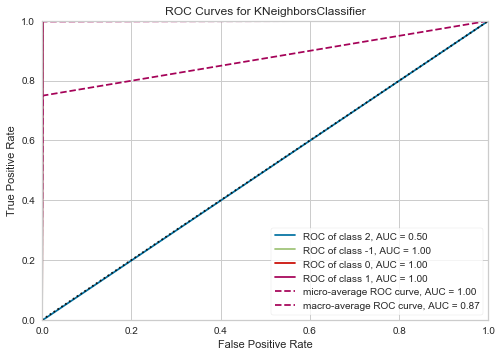

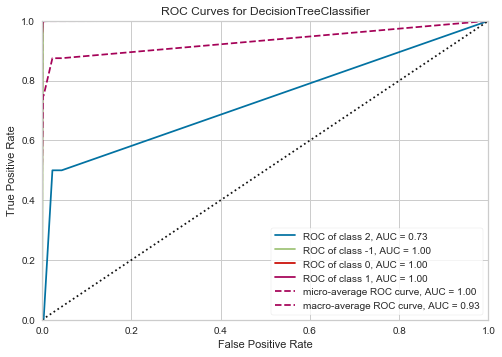

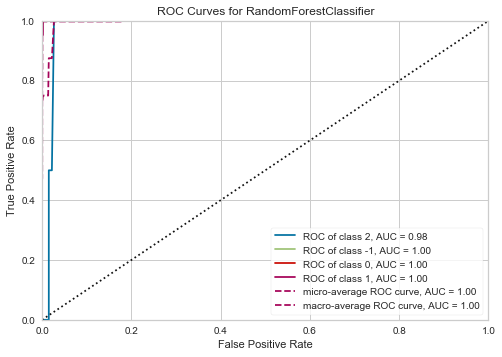

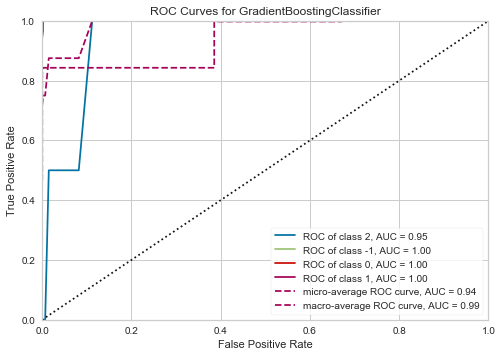

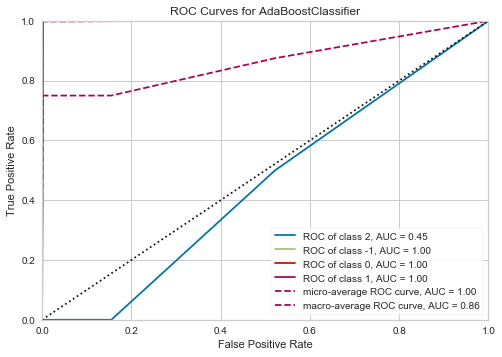

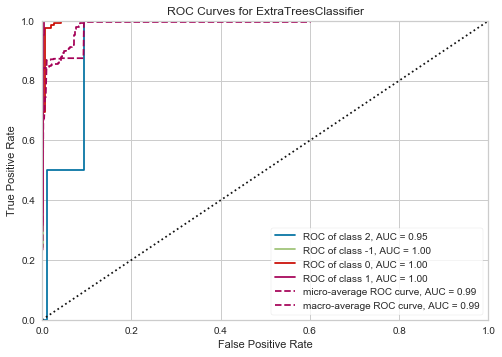

In [299]:
plot_roc(X_train, y_train, X_test, y_test, models, classes)

In [300]:
summary_scores(X_train, y_train, X_test, y_test, models, classes)

,Prediction_Time,Accuracy_Score,f1,Precision,Recall
KNeighborsClassifier,0.0200176,99.77,0.996537,0.995387,0.997691
DecisionTreeClassifier,0.00600529,99.77,0.996537,0.995387,0.997691
RandomForestClassifier,0.0240221,99.77,0.996537,0.995387,0.997691
AdaBoostClassifier,0.399496,99.77,0.996537,0.995387,0.997691
ExtraTreesClassifier,0.0120265,91.22,0.898235,0.915797,0.91224
GradientBoostingClassifier,0.685371,84.3,0.775385,0.724319,0.842956
